In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
sns.set(style='white')

In [4]:
# Class for handling the entire pipeline
class ChurnPipeline:

    def __init__(self, data_path):
        self.data_path = data_path
        self.data = None
        self.preprocessed_data = None

    def load_data(self):
        """Loads data from a CSV file."""
        self.data = pd.read_csv(self.data_path)
        return self.data

    def preprocess_data(self):
        """Handles data preprocessing steps."""
        # Converting 'TotalCharges' to numeric, handling missing values
        self.data['TotalCharges'] = pd.to_numeric(self.data['TotalCharges'], errors='coerce')
        self.data.dropna(inplace=True)
        
        # Removing customer IDs from the data
        df = self.data.iloc[:, 1:]
        
        # Converting 'Churn' into binary numeric variable
        df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
        df['Churn'].replace(to_replace='No', value=0, inplace=True)
        
        # Converting categorical variables into dummy variables
        self.preprocessed_data = pd.get_dummies(df)
        return self.preprocessed_data

    def explore_data(self):
        """Performs data exploration such as correlation analysis."""
        plt.figure(figsize=(15,8))
        self.preprocessed_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
        plt.show()

    def save_preprocessed_data(self, output_path):
        """Save the preprocessed data for future use."""
        self.preprocessed_data.to_csv(output_path, index=False)
        print(f"Preprocessed data saved at {output_path}")

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_33072\2293419498.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_33072\2293419498.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

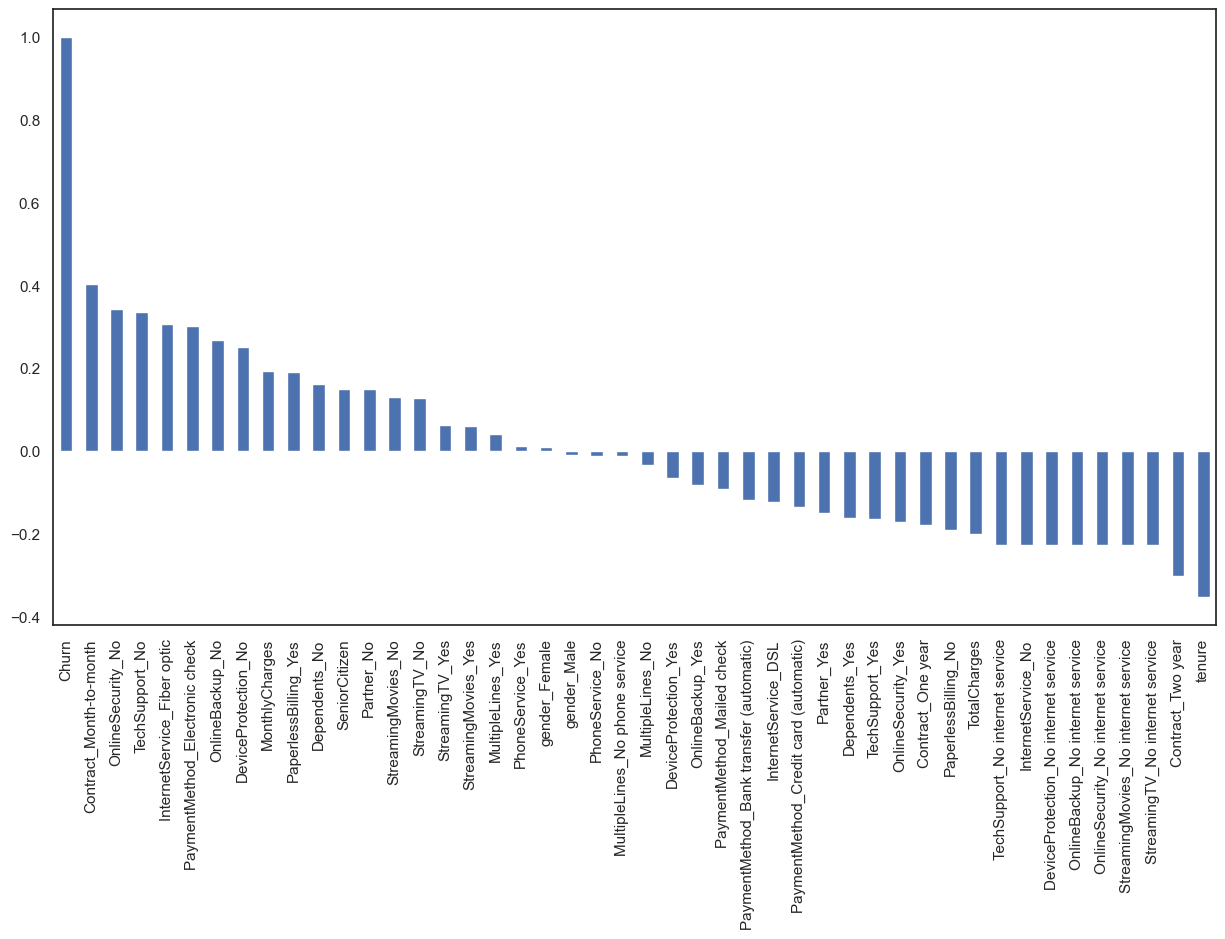

Preprocessed data saved at ../data/customer_churn_preprocessed.csv


In [6]:
# Example usage
if __name__ == "__main__":
    # Initialize the pipeline with the path to the dataset
    churn_pipeline = ChurnPipeline(data_path="../data/customer_churn_org.csv")

    # Load and preprocess data
    data = churn_pipeline.load_data()
    preprocessed_data = churn_pipeline.preprocess_data()

    # Data exploration
    churn_pipeline.explore_data()

    # Save preprocessed data
    churn_pipeline.save_preprocessed_data(output_path="../data/customer_churn_preprocessed.csv")